<a href="https://colab.research.google.com/github/pdivya-mca/Simple-Linear-Regression-Machine-Learning-Algorithm/blob/main/Simple_Linear_Regression_Students_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Linear Regression with Students Dataset**

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#reading dataset(student_scores.csv file)
dataset=pd.read_csv("/content/student_scores.csv")


In [ ]:
#printing shape of dataset
dataset.shape

(25, 2)

In [ ]:
#fetching top 5 rows
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Cleaning Dataset**

In [ ]:
# By using describe function checking for min, max, percentaile and outliers
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#To find outliers  IQR = Q3 - Q1 (ie.75%-25%)

#finding 75th quantile
dataset.Hours.quantile(0.75)

7.4

In [ ]:
#finding 25th quantile
dataset.Hours.quantile(0.25)

2.7

In [ ]:
#finding IQR (IQR = Q3 - Q1 (ie.75%-25%))
iqr=dataset.Hours.quantile(0.75)-dataset.Hours.quantile(0.25)
iqr

4.7

In [ ]:
# finding upper_threshold (ie finding +ve outlier) formula --- Q3+(1.5*iqr)
upper_threshold=dataset.Hours.quantile(0.75)+(1.5*iqr)
upper_threshold

#if max value is greater than upper_threshold value that is outlier. 
#In this case max value is 9 and the and upper_threshold is 14.45 
#so max valu is less than theupper threshold so there is no outlier in this.

14.450000000000001

In [ ]:
# finding lower_threshold (ie finding -ve outlier) formula --- Q1-(1.5*iqr)
lower_threshold=dataset.Hours.quantile(0.25)-(1.5*iqr)
lower_threshold

#in this data set min value is 1.10 so no value is less than lower threshold so no outliers found.

-4.3500000000000005

In [ ]:
#checking for null values
dataset.isnull().sum()

# both columns null count is 0 so no null values in dataset

Hours     0
Scores    0
dtype: int64

In [ ]:
#ckecking for duplicate
dataset.duplicated().sum()

# count is zero so no duplicate

0

In [ ]:
#checking for datatype in right format or not
dataset.dtypes

#datatype also in the right format and and also a strctured data.

Hours     float64
Scores      int64
dtype: object

**Exploratory Data Analysis (EDA)**

Text(0, 0.5, 'Pergentage Score')

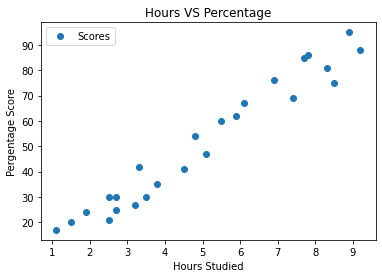

In [ ]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Pergentage Score")

1) There is relationship between the feature and target. If studied hour increases scoring percentage also increases.2) There is a linear relationship between hours ans score. while looking into the graph it looks like a straight line so no need of transformation required.3) To check exact relation between hours studied and score will go for correlation method

In [ ]:
#checking for corelation
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above matrics hours vs score is 0.976191 . it is greater than 0.2 and t is near to 1 . so itis highly postive correlated. so we can move a head and create a linear regression model. No transformation required. 

**Encoding Data**

In [ ]:
#encoding is required only for categorical data. here datas are not in categoriacal format so encoding is not required.
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

**Spliting the Data**

X - Feature y-target variable
extracting all the feature and stored in a variable called X, extracting all the target and stored it in a variable calle y. 
splitting the data into train and split, test_size denotes the spliting data if we give test size is 0.2 the train data is 80% and test data is 20 % like that it will split.
.values convers the valueinto numpy array

In [ ]:
#dataset.iloc[row_criteria,column_criteria]

In [ ]:
X=dataset.loc[:,['Hours']].values #selecting all rows and only feature column 'Hours'
y=dataset.loc[:,'Scores'].values # selecting all rows and selecting only the tagert 'Scores' column

#importing required function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25)

X_train, X_test - all the feature are stores in X_train and X_test
, y_train, y_test - allthe target are stored in y_train and y_test

In [ ]:
#finding shape of X_train , X_test
X_train.shape,X_test.shape

((18, 1), (7, 1))

**Modelling**

In [ ]:
#importing functions
from sklearn.linear_model import LinearRegression
"Symtax : varName = ModelName(modelHyperParams)"
regressor=LinearRegression() # spredicted score = m * hours + c
regressor.fit(X_train,y_train)


LinearRegression()

In [ ]:
#finding the value of c
print(regressor.intercept_)

2.192983236248814


In [ ]:
#finding the value of m
print(regressor.coef_)

[9.75899329]


In [ ]:
#sample prediting for the value 7 hours of study
regressor.predict([[7]])
#percentage mark gets from output

array([70.50593624])

In [ ]:
#predecting feature of test dataset
"Syntax : varName.predict(test_features)"
y_pred=regressor.predict(X_test)
y_pred

array([55.86744631, 89.04802348, 39.27715772, 46.10845302, 20.73507048,
       34.39766108, 83.19262751])

In [ ]:
#comparing actual test and predicted test
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,60,55.867446
1,95,89.048023
2,35,39.277158
3,41,46.108453
4,24,20.735070
5,42,34.397661
6,81,83.192628


**Evaluation Metrics**

if the r2 > 0 its a good model, r2 < 0 the model is not good ie it fit for nothing

In [ ]:
#metrics will contain all evaluation metrics
from sklearn import metrics 

#finding r2
print('R2 Score:',metrics.r2_score(y_test,y_pred))

#another way to get r^2 values
regressor.score(X_test,y_test)

R2 Score: 0.9576723054169087


0.9576723054169087

**In this data set R2 Score is greater than 0 and its near to 1 so Linear Regression model is a great model**